In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from load_data2 import evals_parser, evals_square_parser, evecs_parser

In [6]:
# Importing the datasets
batch_size = 16
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

evals_dataset = dataset.map(evals_parser)
evals_dataset = evals_dataset.shuffle(buffer_size=10).batch(batch_size)

evals_square_dataset = dataset.map(evals_square_parser)
evals_square_dataset = evals_square_dataset.shuffle(buffer_size=10).batch(batch_size)

evecs_dataset = dataset.map(evecs_parser)
evecs_dataset = evecs_dataset.shuffle(buffer_size=10).batch(batch_size)

### WGANGP to generate eigenvalues

In [7]:
from evals_WGANGP2 import evals_WGANGP

# Creating GAN
evals_wgangp = evals_WGANGP()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 512)               66048     
                                                                 
 reshape (Reshape)           (None, 2, 2, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 4, 4, 128)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 128)         262272    
                                                                 
 batch_normalization_30 (Bat  (None, 4, 4, 128)        512       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 4, 4, 128)       

/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Non-trainable params: 384
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          160       
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 4, 4, 16)          0         
                                                                 
 dropout (Dropout)           (None, 4, 4, 16)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          4640      
                                                                 
 zero_padding2d (ZeroPadding  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_32 (Ba

In [9]:
evals_wgangp.train(evals_dataset=evals_square_dataset, n_epoch=500)

TypeError: evals_WGANGP.train() got an unexpected keyword argument 'evals_square_dataset'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

is_real, sample = evals_wgangp.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))    
    

### GRIDSEARCH: GAN to generate eigenvalues

In [ ]:
from tensorflow import summary
from evals_GAN2 import evals_GAN

lr_list = [5e-7, 1e-7, 5e-8, 1e-8, 5e-9, 1e-9]
#lr_list = [1e-10, 1e-11, 1e-12]
beta_1_list = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for lr in lr_list:
    for beta_1 in beta_1_list:
        
        print(f"lr={lr}, beta_1={beta_1}")
        
        evals_gan = evals_GAN(lr, beta_1, summary=False) # Creating GAN
        evals_gan.train(evals_dataset=evals_dataset, n_epoch=500, print_epoch=False) # Training the GAN

        # Plotting sampled eigenvalues 
        is_real, sample = evals_gan.get_evals()
        
        fig = plt.figure()

        if is_real:
            plt.title(f"generated sample, detected as real, lr={lr}, b={beta_1}")
            plt.plot(np.sort(np.array(sample)[0]))
        else:
            plt.title(f"generated sample, detected as fake, lr={lr}, b={beta_1}")
            plt.plot(np.sort(np.array(sample)[0]))

lr=1e-09, beta_1=0.5


2022-10-12 14:24:43.546276: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2022-10-12 14:24:53.629134: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 125ms/step
tf.Tensor(0.6167383, shape=(), dtype=float32)
real eigenvalues found
lr=1e-09, beta_1=0.7


2022-10-12 14:25:04.124523: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2022-10-12 14:25:05.324581: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 116ms/step
tf.Tensor(0.6576207, shape=(), dtype=float32)
real eigenvalues found
lr=1e-08, beta_1=0.2
1/1 [==============================] - 0s 119ms/step
tf.Tensor(0.61123127, shape=(), dtype=float32)
real eigenvalues found
lr=1e-07, beta_1=0.1


2022-10-12 14:25:41.443141: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 120ms/step
tf.Tensor(0.5634986, shape=(), dtype=float32)
real eigenvalues found
lr=1e-07, beta_1=0.9


2022-10-12 14:25:50.173581: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 441ms/step
tf.Tensor(0.44101596, shape=(), dtype=float32)
real eigenvalues found


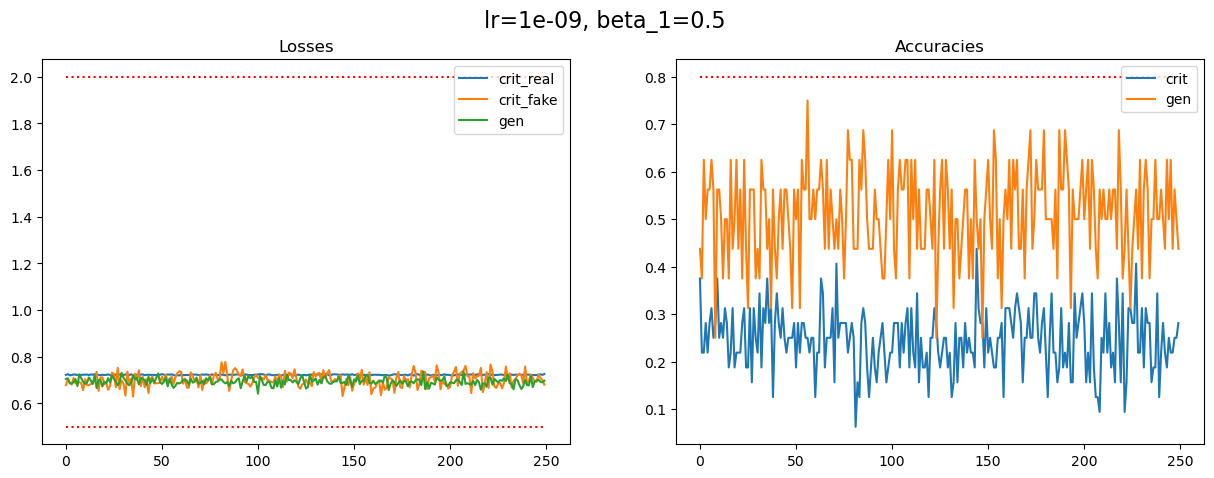

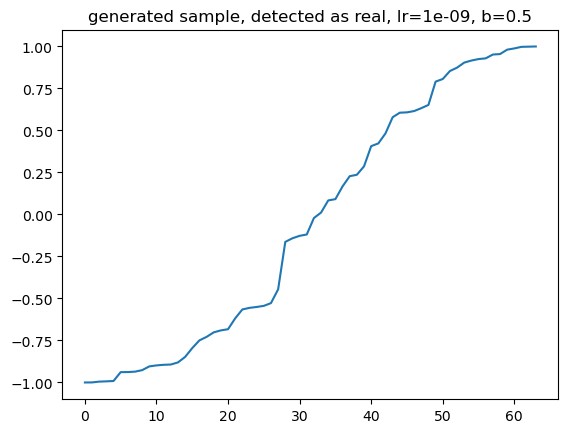

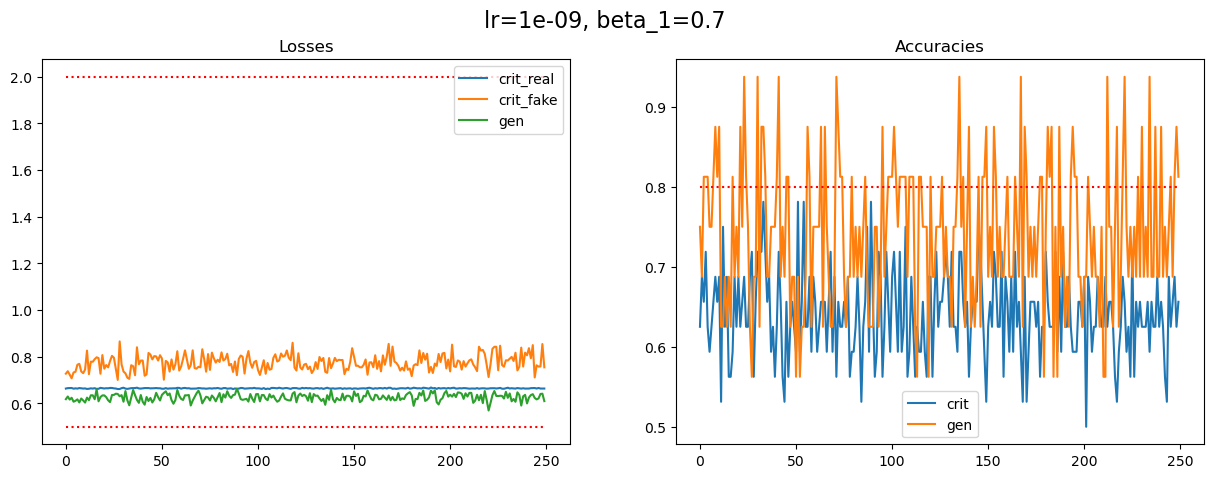

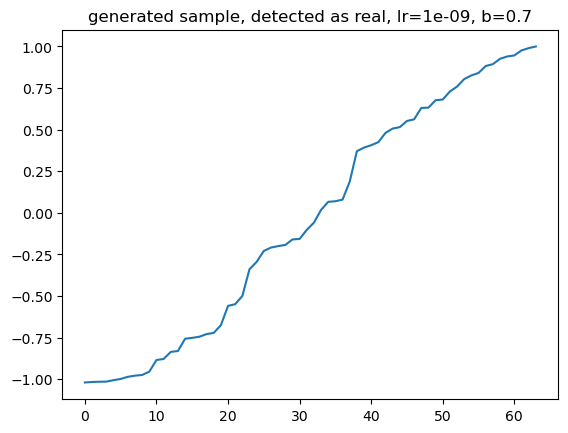

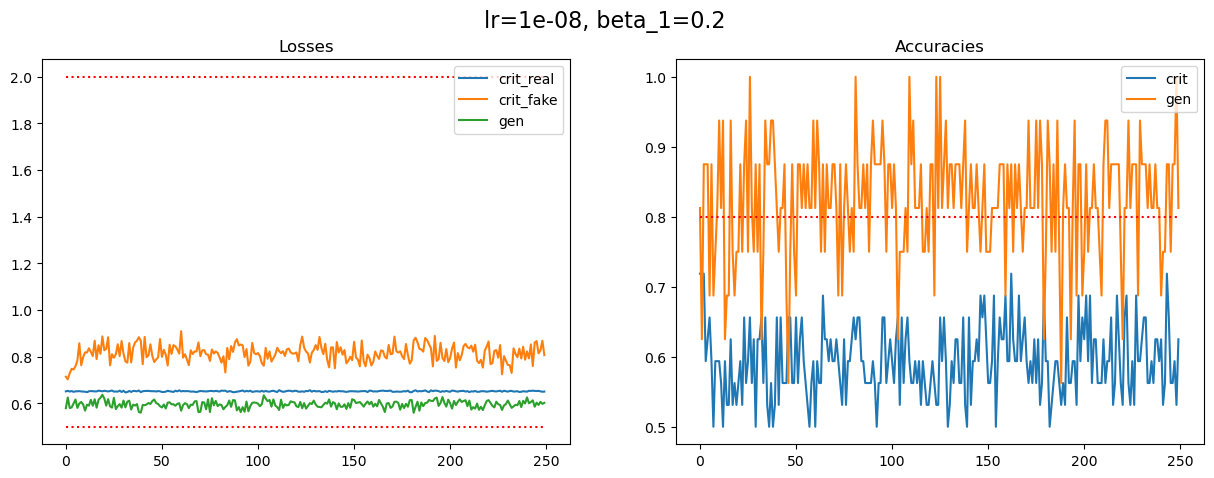

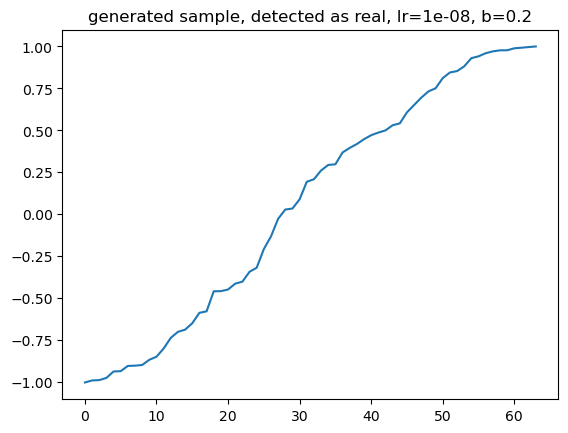

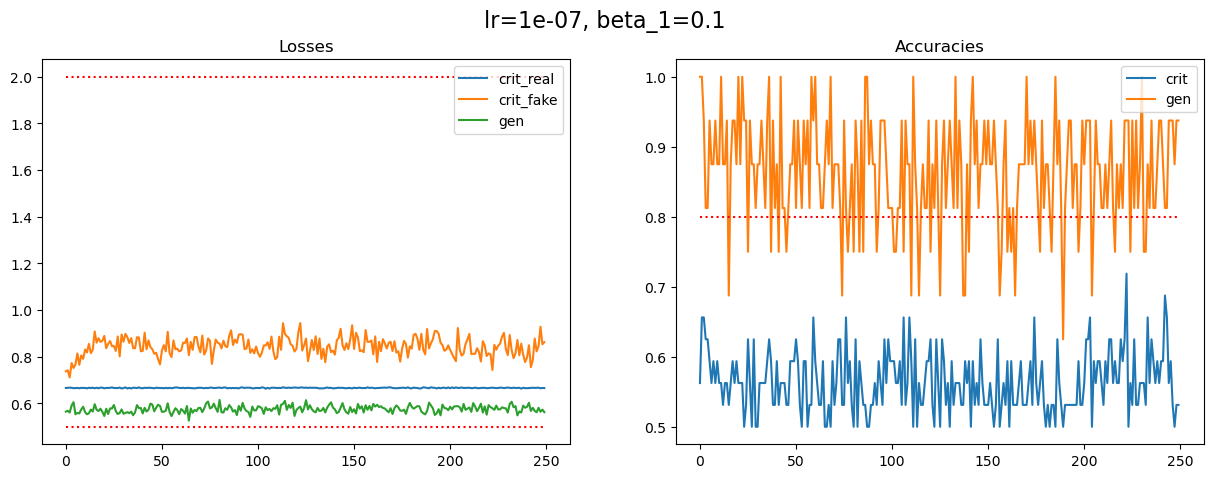

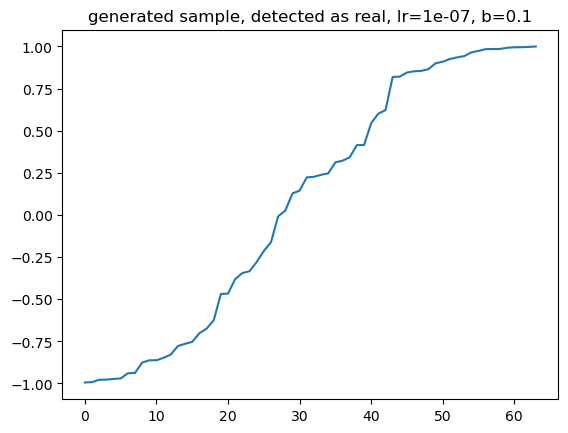

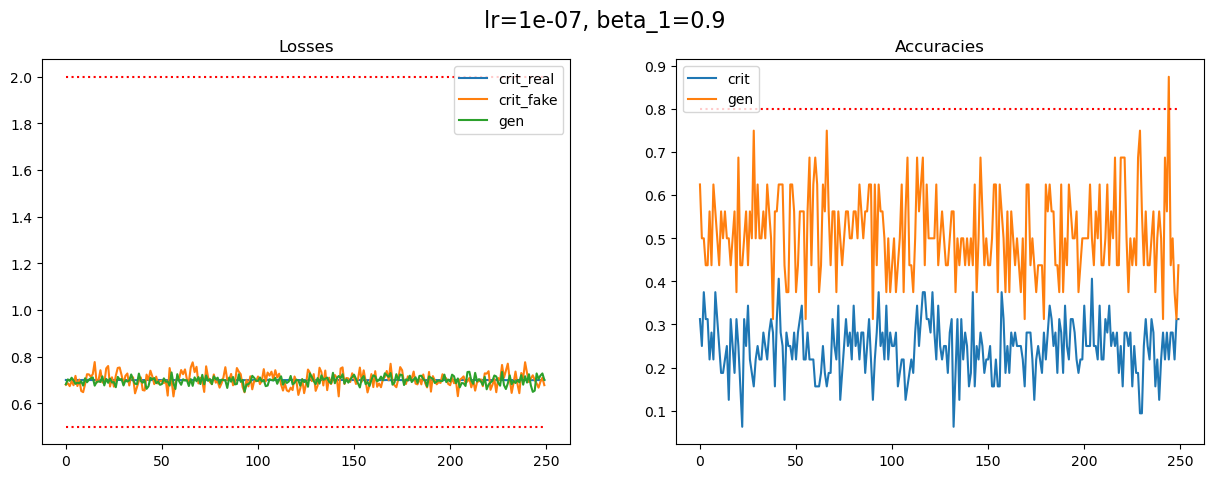

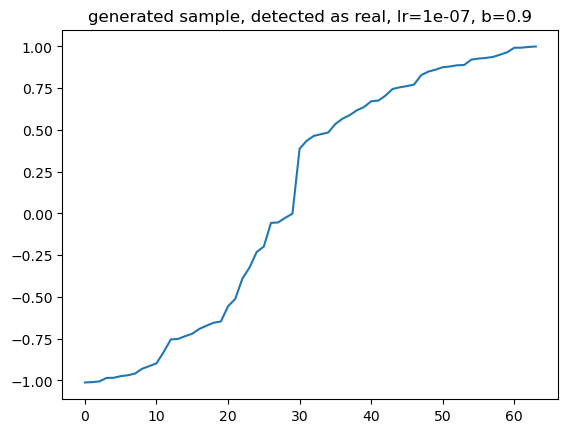

In [4]:
# Grid search 2
#from tensorflow import summary
from evals_GAN2 import evals_GAN

lr_list = [1e-9, 1e-9, 1e-8, 1e-7, 1e-7]
beta_1_list = [0.5, 0.7, 0.2, 0.1, 0.9]

n_epoch=250

for lr, beta_1 in zip(lr_list, beta_1_list):
    
    print(f"lr={lr}, beta_1={beta_1}")
    
    evals_gan = evals_GAN(lr, beta_1, summary=False) # Creating GAN
    evals_gan.train(evals_dataset=evals_dataset, n_epoch=n_epoch, print_epoch=False) # Training the GAN

    # Plotting sampled eigenvalues 
    is_real, sample = evals_gan.get_evals()
    
    fig = plt.figure()

    if is_real:
        plt.title(f"generated sample, detected as real, lr={lr}, b={beta_1}")
        plt.plot(np.sort(np.array(sample)[0]))
    else:
        plt.title(f"generated sample, detected as fake, lr={lr}, b={beta_1}")
        plt.plot(np.sort(np.array(sample)[0]))
    
# runtime   : 1000 epochs  : approx 5min30
# runtime   : 250 epochs   : approx 1min30

### GAN to generate eigenvalues

In [ ]:
from evals_GAN2 import evals_GAN

# Creating GAN
evals_gan = evals_GAN()

# Training the GAN
evals_gan.train(evals_dataset=evals_dataset, n_epoch=100)

In [ ]:
# Plotting sampled eigenvalues 
is_real, sample = evals_gan.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))

### DCGAN to generate eigenvalues

In [ ]:
from evals_DCGAN2 import evals_DCGAN

# Creating GAN
evals_dcgan = evals_DCGAN()

# Training the GAN
evals_dcgan.train(evals_dataset=evals_dataset, n_epoch=300)

In [ ]:
# Plotting sampled eigenvalues 
is_real, sample = evals_dcgan.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))

### WGAN to generate eigenvectors 

In [ ]:
from evecs_WGAN2 import evecs_WGAN

# Creating WGAN
evecs_wgan = evecs_WGAN()

In [ ]:
evecs_wgan.train(evecs_dataset=evecs_dataset, n_epoch=1000)

In [ ]:
sample = evecs_wgan.get_evecs()